In [2]:
import pandas as pd


batting = pd.read_csv("../DATA/batting.csv") 
fielding = pd.read_csv("../DATA/fielding.csv")
hall_of_fame = pd.read_csv("../DATA/hall_of_fame.csv")
player_award = pd.read_csv("../DATA/player_award.csv")
player = pd.read_csv("../DATA/player.csv")
salary = pd.read_csv("../DATA/salary.csv")
team = pd.read_csv("../DATA/team.csv")

table_files = [batting, fielding, hall_of_fame, player_award, player, salary, team]
for file in table_files:
    print(file.head(5))


## MODIFICATIONS

#Creation of batting_2 table
batting_2 = batting[(batting['hr'].notnull()) & (batting['hr'] > 0) & (batting['ab'].notnull()) & (batting['ab'] > 0)]
batting_2.to_csv('batting_2.csv', index=False)

#Altering player table
player['full_name'] = player['name_first'] + ' ' + player['name_last']  

   player_id  year  stint team_id league_id   g     ab     r     h  double  \
0  abercda01  1871      1     TRO       NaN   1    4.0   0.0   0.0     0.0   
1   addybo01  1871      1     RC1       NaN  25  118.0  30.0  32.0     6.0   
2  allisar01  1871      1     CL1       NaN  29  137.0  28.0  40.0     4.0   
3  allisdo01  1871      1     WS3       NaN  27  133.0  28.0  44.0    10.0   
4  ansonca01  1871      1     RC1       NaN  25  120.0  29.0  39.0    11.0   

   ...   rbi   sb   cs   bb   so  ibb  hbp  sh  sf  g_idp  
0  ...   0.0  0.0  0.0  0.0  0.0  NaN  NaN NaN NaN    NaN  
1  ...  13.0  8.0  1.0  4.0  0.0  NaN  NaN NaN NaN    NaN  
2  ...  19.0  3.0  1.0  2.0  5.0  NaN  NaN NaN NaN    NaN  
3  ...  27.0  1.0  1.0  0.0  2.0  NaN  NaN NaN NaN    NaN  
4  ...  16.0  6.0  2.0  2.0  1.0  NaN  NaN NaN NaN    NaN  

[5 rows x 22 columns]
   player_id  year  stint team_id league_id pos   g  gs  inn_outs    po     a  \
0  abercda01  1871      1     TRO       NaN  SS   1 NaN       NaN  

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

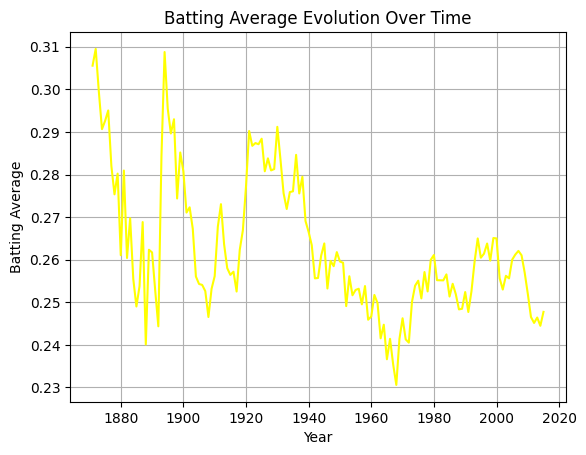

In [43]:
# Batting Average Evolution Over Time
""" Here we find a clear downtrend on the batting average of players throughout the years. Several factors might contribute to this trend, such as evolving game strategies emphasizing pitching excellence, improvements in pitching techniques and training.
"""
batting_avg_grouped = batting_2.groupby('year')['batting_avg'].mean().reset_index()
batting_avg_grouped

sns.lineplot(batting_avg_grouped, x='year', y='batting_avg', color='yellow')
plt.xlabel('Year')
plt.ylabel('Batting Average')
plt.title('Batting Average Evolution Over Time')
plt.grid(True)

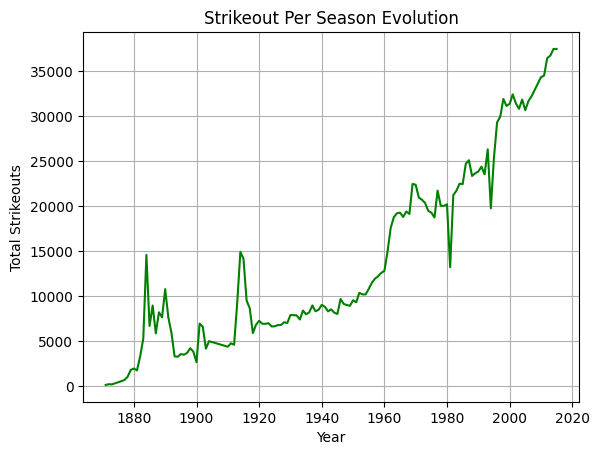

In [55]:
# Strikeouts Per Year Evolution
"""The upward trend in strikeouts aligns with the previous observation of declining batting averages, indicating a shift towards a game style that prioritizes power pitching. This trend reflects a strategic emphasis on pitching dominance and a preference for a style of play centered around power and precision on the mound.
"""

tot_strikes_per_year = team[(team['so']!=0) & (team['so'].notna())].groupby('year')['so'].sum().reset_index()
tot_strikes_per_year

sns.lineplot(data = tot_strikes_per_year, x = 'year', y = 'so', color='green')
plt.xlabel('Year')
plt.ylabel('Total Strikeouts')
plt.title('Strikeout Per Season Evolution')
plt.grid(True)

C:\Users\andre\AppData\Local\Temp\ipykernel_26760\1087515855.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hitters, x='hr', y='full_name', palette= 'pastel')


Text(0, 0.5, 'Players')

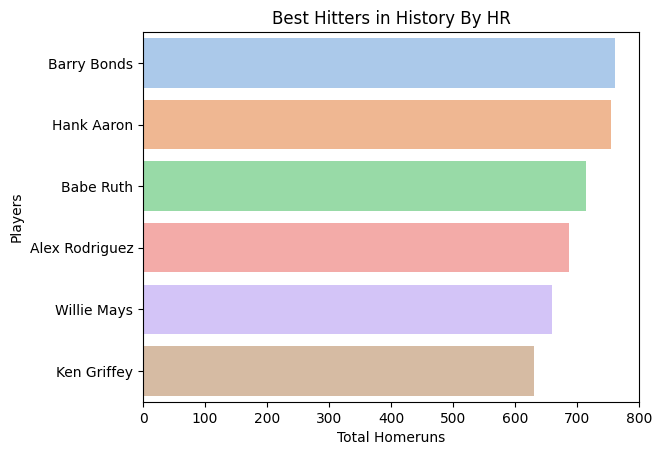

In [81]:
merged_df = pd.merge(batting_2, player, on = 'player_id')
hitters = merged_df.groupby(['player_id', 'name_first','name_last'])['hr'].sum().reset_index().sort_values(by='hr', ascending=False).head(6).reset_index(drop=True)
hitters['full_name'] = hitters['name_first'] + ' ' + hitters['name_last']
hitters = hitters[[ 'full_name', 'hr']]
hitters

sns.barplot(hitters, x='hr', y='full_name', palette= 'pastel')

plt.title('Best Hitters in History By HR')
plt.xlabel('Total Homeruns')
plt.ylabel('Players')


C:\Users\andre\AppData\Local\Temp\ipykernel_26760\89229060.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(result_df, x='pos', y='salary', palette='colorblind')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '1B'),
  Text(1, 0, 'OF'),
  Text(2, 0, 'CF'),
  Text(3, 0, 'RF'),
  Text(4, 0, 'P'),
  Text(5, 0, 'LF'),
  Text(6, 0, '3B'),
  Text(7, 0, 'SS'),
  Text(8, 0, '2B'),
  Text(9, 0, 'C')])

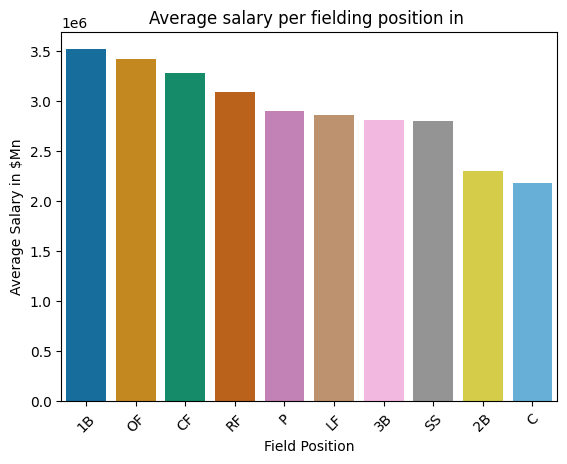

In [83]:
merged_df = pd.merge(salary, fielding, on = 'player_id')
filtered_df = merged_df[merged_df['year_y']>=2000].groupby('pos')['salary'].mean().reset_index()
result_df = filtered_df.sort_values(by='salary', ascending=False).reset_index(drop=True)
result_df

sns.barplot(result_df, x='pos', y='salary', palette='colorblind')
plt.title('Average salary per fielding position in ')
plt.xlabel('Field Position')
plt.ylabel('Average Salary in $Mn')
plt.xticks(rotation=45)

In [9]:
#1
best_hitters = batting[batting['hr'].notnull()].groupby('player_id').hr.sum().reset_index().sort_values(by= 'hr', ascending=False).head(25).reset_index(drop=True)
best_hitters

NameError: name 'batting' is not defined

In [12]:
#2
merged_df = pd.merge(batting_2, player, on = 'player_id')
filtered_df = merged_df[merged_df['team_id']=='BOS'].groupby(['player_id', 'name_first', 'name_last']).hr.sum().reset_index()
filtered_df['full_name'] = filtered_df['name_first'] + ' ' + filtered_df['name_last']
filtered_df = filtered_df[['player_id', 'full_name', 'hr']]
result_df = filtered_df.sort_values(by='hr', ascending=False).head(10)
result_df

,player_id,full_name,hr
624,willite01,Ted Williams,521.0
635,yastrca01,Carl Yastrzemski,452.0
419,ortizda01,David Ortiz,445.0
480,riceji01,Jim Rice,382.0
170,evansdw01,Dwight Evans,379.0
467,ramirma02,Manny Ramirez,274.0
593,vaughmo01,Mo Vaughn,230.0
154,doerrbo01,Bobby Doerr,223.0
186,foxxji01,Jimmie Foxx,222.0
445,petrori01,Rico Petrocelli,210.0


C:\Users\andre\AppData\Local\Temp\ipykernel_19404\2376274684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['batting_avg'] = filtered_df['h'] / filtered_df['ab']


,full_name,hr,batting_avg,Rank
0,Chris Davis,47.0,0.261780,37362
1,Nelson Cruz,44.0,0.301695,36461
2,Bryce Harper,42.0,0.330134,38813
3,Nolan Arenado,42.0,0.287338,38963
4,Mike Trout,41.0,0.299130,38674
5,Josh Donaldson,41.0,0.296774,38153
6,Carlos Gonzalez,40.0,0.270758,37397
7,Jose Bautista,40.0,0.250460,36418
8,Albert Pujols,40.0,0.244186,34335
9,Edwin Encarnacion,39.0,0.276515,36069


In [10]:
#3
merged_df = pd.merge(batting_2, player, on='player_id')
filtered_df = merged_df[merged_df['year'] == 2015]
filtered_df['batting_avg'] = filtered_df['h'] / filtered_df['ab']
sorted_df = filtered_df.sort_values(by=['hr', 'batting_avg'], ascending=[False, False])
sorted_df.reset_index(drop=True, inplace=True)
sorted_df['Rank'] = sorted_df.index + 1
result = sorted_df[['full_name', 'hr', 'batting_avg', 'Rank']].head(25).reset_index(drop=True)
print(result)

            full_name    hr  batting_avg  Rank
0         Chris Davis  47.0     0.261780     1
1         Nelson Cruz  44.0     0.301695     2
2        Bryce Harper  42.0     0.330134     3
3       Nolan Arenado  42.0     0.287338     4
4          Mike Trout  41.0     0.299130     5
5      Josh Donaldson  41.0     0.296774     6
6     Carlos Gonzalez  40.0     0.270758     7
7       Jose Bautista  40.0     0.250460     8
8       Albert Pujols  40.0     0.244186     9
9   Edwin Encarnacion  39.0     0.276515    10
10     J. D. Martinez  38.0     0.281879    11
11        David Ortiz  37.0     0.272727    12
12      Manny Machado  35.0     0.285940    13
13       Todd Frazier  35.0     0.255250    14
14   Paul Goldschmidt  33.0     0.320988    15
15     Alex Rodriguez  33.0     0.250478    16
16      Anthony Rizzo  31.0     0.278157    17
17      Mark Teixeira  31.0     0.255102    18
18         Jose Abreu  30.0     0.290375    19
19         Joey Votto  29.0     0.313761    20
20    Adrian 

C:\Users\andre\AppData\Local\Temp\ipykernel_19404\624457644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['batting_avg'] = filtered_df['h'] / filtered_df['ab']


In [7]:
#4
merged_df = pd.merge(batting_2, player, on = 'player_id')
filtered_df = merged_df[(merged_df['ab'] >= 100) & (merged_df['year']==2000)]
grouped_df = filtered_df.groupby(['player_id', 'full_name'])[['ab','hr']].sum().reset_index()
grouped_df['Homeruns_per_ab'] = round(grouped_df['hr'] / grouped_df['ab'],3)
result_df = grouped_df.sort_values(by='Homeruns_per_ab', ascending=False).head(50).reset_index(drop=True)
result_df

,player_id,full_name,ab,hr,Homeruns_per_ab
0,mcgwima01,Mark McGwire,236.0,32.0,0.136
1,bondsba01,Barry Bonds,480.0,49.0,0.102
2,hillgl01,Glenallen Hill,300.0,27.0,0.090
3,ramirma02,Manny Ramirez,439.0,38.0,0.087
4,sheffga01,Gary Sheffield,501.0,43.0,0.086
5,giambja01,Jason Giambi,510.0,43.0,0.084
6,glaustr01,Troy Glaus,563.0,47.0,0.083
7,branyru01,Russell Branyan,193.0,16.0,0.083
8,sosasa01,Sammy Sosa,604.0,50.0,0.083
9,bagweje01,Jeff Bagwell,590.0,47.0,0.080


In [38]:
#5
league_avg = batting_2[batting_2['ab']>=100]
league_avg = league_avg.h.sum() / league_avg.ab.sum()
league_avg

merged_df = pd.merge(batting, player, on='player_id')
filtered_df = merged_df[(merged_df['ab']>=200) & (merged_df['team_id']=='NYA')]
grouped_df = filtered_df.groupby(['player_id', 'full_name'])[['h','ab']].sum().reset_index()
grouped_df['batting_avg'] = round(grouped_df['h'] / grouped_df['ab'],3)
grouped_df['batting_performance'] = grouped_df['batting_avg'].apply(lambda x: 'Above_avg' if x > league_avg else 'Below_avg')
ordered_df = grouped_df.sort_values(by='batting_avg', ascending=False).head(25).reset_index(drop=True)
ordered_df

,player_id,full_name,h,ab,batting_avg,batting_performance
0,ruthba01,Babe Ruth,2518.0,7216.0,0.349,Above_avg
1,gehrilo01,Lou Gehrig,2700.0,7935.0,0.340,Above_avg
2,duncama01,Mariano Duncan,136.0,400.0,0.340,Above_avg
3,dimagjo01,Joe DiMaggio,2214.0,6821.0,0.325,Above_avg
4,combsea01,Earle Combs,1852.0,5711.0,0.324,Above_avg
5,paschbe01,Ben Paschal,163.0,505.0,0.323,Above_avg
6,jamesdi01,Dion James,174.0,552.0,0.315,Above_avg
7,dickebi01,Bill Dickey,1931.0,6151.0,0.314,Above_avg
8,boggswa01,Wade Boggs,702.0,2240.0,0.313,Above_avg
9,meusebo01,Bob Meusel,1565.0,5032.0,0.311,Above_avg


In [172]:
#6
filtered_df = team[team['year']>=2000].groupby('name')[['attendance', 'g']].sum().reset_index()
filtered_df['avg_attendance_per_game'] = round(filtered_df['attendance'] / filtered_df['g'])
result_df = filtered_df.sort_values(by='avg_attendance_per_game', ascending=False)
result_df

,name,attendance,g,avg_attendance_per_game
21,New York Yankees,58491801.0,2590,22584.0
15,Los Angeles Dodgers,55479368.0,2591,21412.0
28,St. Louis Cardinals,52779669.0,2591,20370.0
26,San Francisco Giants,51539703.0,2590,19899.0
14,Los Angeles Angels of Anaheim,35361353.0,1782,19844.0
5,Chicago Cubs,47557886.0,2590,18362.0
4,Boston Red Sox,46097292.0,2591,17791.0
23,Philadelphia Phillies,44183070.0,2591,17053.0
20,New York Mets,44026638.0,2590,16999.0
9,Colorado Rockies,41978667.0,2593,16189.0


In [39]:
#7
merged_df = pd.merge(player, player_award, on = 'player_id')
filtered_df = merged_df[merged_df['award_id']=='Pitching Triple Crown']
grouped_df = filtered_df.groupby(['player_id', 'full_name']).award_id.count().reset_index().sort_values(by='award_id', ascending=False).head(10).reset_index(drop=True)
grouped_df

,player_id,full_name,award_id
0,alexape01,Pete Alexander,3
1,johnswa01,Walter Johnson,3
2,koufasa01,Sandy Koufax,3
3,gomezle01,Lefty Gomez,2
4,grovele01,Lefty Grove,2
5,clemero02,Roger Clemens,2
6,mathech01,Christy Mathewson,2
7,clarkjo01,John Clarkson,1
8,peavyja01,Jake Peavy,1
9,waltebu01,Bucky Walters,1


,player_id,full_name,award_id
0,alexape01,Pete Alexander,3
1,johnswa01,Walter Johnson,3
2,koufasa01,Sandy Koufax,3
3,gomezle01,Lefty Gomez,2
4,grovele01,Lefty Grove,2
5,clemero02,Roger Clemens,2
6,mathech01,Christy Mathewson,2
7,clarkjo01,John Clarkson,1
8,peavyja01,Jake Peavy,1
9,waltebu01,Bucky Walters,1


In [4]:
#8 
filtered_df = salary[salary['year']==2015].groupby('team_id').salary.agg(average_salary = 'mean', max_salary = 'max').reset_index()
filtered_df['salary_disparity'] = ((filtered_df['max_salary'] - filtered_df['average_salary']) / filtered_df['average_salary'] * 100).round(2).astype(str) + '%'
result_df = filtered_df[['team_id', 'average_salary', 'max_salary', 'salary_disparity']].sort_values(by='salary_disparity', ascending=False)
result_df

,team_id,average_salary,max_salary,salary_disparity
20,PHI,4.295885e+06,25000000,481.95%
0,ARI,2.132207e+06,12000000,462.8%
12,LAA,4.444645e+06,24000000,439.98%
16,MIN,4.310200e+06,23000000,433.62%
8,COL,3.827544e+06,20000000,422.53%
18,NYN,3.870667e+06,20000000,416.71%
23,SEA,4.888348e+06,24857000,408.49%
27,TEX,4.791426e+06,24000000,400.89%
7,CLE,3.022888e+06,15000000,396.21%
26,TBA,2.224870e+06,11000000,394.41%


In [40]:
#9
merged_df = pd.merge(batting_2, player, on = 'player_id')
full_merge = pd.merge(merged_df, hall_of_fame, on = 'player_id')
filtered_df = full_merge[(full_merge['year']>1950) & (full_merge['inducted']=='Y')].groupby(['player_id', 'full_name'])['h'].sum().reset_index()
result_df = filtered_df.sort_values(by='h', ascending=False).head(25).reset_index(drop=True)
result_df

,player_id,full_name,h
0,aaronha01,Hank Aaron,3771.0
1,yastrca01,Carl Yastrzemski,3419.0
2,molitpa01,Paul Molitor,3309.0
3,mayswi01,Willie Mays,3274.0
4,murraed02,Eddie Murray,3253.0
5,ripkeca01,Cal Ripken,3179.0
6,brettge01,George Brett,3149.0
7,yountro01,Robin Yount,3142.0
8,gwynnto01,Tony Gwynn,3141.0
9,winfida01,Dave Winfield,3110.0


In [14]:
#10
merged_df = pd.merge(salary, fielding, on = 'player_id')
full_merge = pd.merge(merged_df, player, on = 'player_id')
grouped_df = full_merge.groupby(['player_id', 'full_name', 'pos'])['salary'].max().reset_index()
result_df = grouped_df.sort_values(by='salary', ascending=False).head(50)
result_df

,player_id,full_name,pos,salary
10621,rodrial01,Alex Rodriguez,SS,33000000
10620,rodrial01,Alex Rodriguez,DH,33000000
10619,rodrial01,Alex Rodriguez,3B,33000000
10618,rodrial01,Alex Rodriguez,1B,33000000
6610,kershcl01,Clayton Kershaw,P,32571000
12752,verlaju01,Justin Verlander,P,28000000
13064,wellsve01,Vernon Wells,2B,26187500
13066,wellsve01,Vernon Wells,CF,26187500
13068,wellsve01,Vernon Wells,OF,26187500
13067,wellsve01,Vernon Wells,LF,26187500


In [41]:
#11
merged_df = pd.merge(salary, fielding, on = 'player_id')
filtered_df = merged_df[merged_df['year_y']>=2000].groupby('pos')['salary'].mean().reset_index()
ordered_df = filtered_df.sort_values(by='salary', ascending=False).reset_index(drop=True)
ordered_df



,pos,salary
0,1B,3.517212e+06
1,OF,3.421048e+06
2,CF,3.279103e+06
3,RF,3.093472e+06
4,P,2.903943e+06
5,LF,2.867335e+06
6,3B,2.815175e+06
7,SS,2.807452e+06
8,2B,2.300095e+06
9,C,2.179792e+06


In [17]:
#12 
merged_df = pd.merge(player, salary, on = 'player_id')
full_merge = pd.merge(merged_df, fielding, on = 'player_id')
avg_salary = salary[salary['year']==2015].salary.mean()
avg_salary
filtered_df = full_merge[(full_merge['salary']>avg_salary) & (full_merge['year_x']==2015) & (full_merge['pos']=='P')]
grouped_df = filtered_df.groupby('full_name').salary.max().reset_index()
result_df = grouped_df.sort_values(by='salary', ascending=False).head(25).reset_index(drop=True)
result_df



,full_name,salary
0,Clayton Kershaw,32571000
1,Justin Verlander,28000000
2,Zack Greinke,25000000
3,Felix Hernandez,24857000
4,Cole Hamels,23500000
5,CC Sabathia,23000000
6,Masahiro Tanaka,22000000
7,Matt Cain,21000000
8,Jon Lester,20000000
9,Mark Buehrle,20000000


In [18]:
#13
team['decade'] = (team.year // 10) * 10
team['avg_so_per_game'] = (team.so / team.g).round(2)
grouped_df = team.groupby('decade').avg_so_per_game.mean().reset_index()
result_df = grouped_df.sort_values(by='decade', ascending=False).reset_index(drop=True)
result_df

,decade,avg_so_per_game
0,2010,7.435889
1,2000,6.561033
2,1990,6.150827
3,1980,5.342615
4,1970,5.144959
5,1960,5.712727
6,1950,4.399437
7,1940,3.550000
8,1930,3.316375
9,1920,2.814437


In [19]:
#14
team['decade'] = (team.year // 10) * 10
team['avg_hr_per_game'] = (team.hr / team.g).round(3)
grouped_df = team.groupby('decade').avg_hr_per_game.mean().reset_index()
result_df = grouped_df.sort_values(by='decade', ascending=False).reset_index(drop=True)
result_df

,decade,avg_hr_per_game
0,2010,0.955328
1,2000,1.073370
2,1990,0.960288
3,1980,0.804019
4,1970,0.745614
5,1960,0.820222
6,1950,0.843019
7,1940,0.523094
8,1930,0.545725
9,1920,0.401719


In [20]:
#15
team['winning_percentage'] = ((team.w / team.g)*100).round(2)
filtered_df = team[(team['ws_win']== 'N') & (team['year']>=2000)]
grouped_df = filtered_df.groupby(['name', 'g', 'w', 'winning_percentage', 'year']).first().reset_index()
ordered_df = grouped_df.sort_values(by='winning_percentage', ascending=False).head(5).reset_index(drop=True)
result_df = ordered_df[['name', 'g', 'w', 'winning_percentage', 'year']]
result_df

,name,g,w,winning_percentage,year
0,Seattle Mariners,162,116,71.60,2001
1,St. Louis Cardinals,162,105,64.81,2004
2,New York Yankees,161,103,63.98,2002
3,Oakland Athletics,162,103,63.58,2002
4,Philadelphia Phillies,162,102,62.96,2011


In [70]:
#16
filtered_df = team[(team['ws_win']== 'Y') & (team['year']>=2000)]
filtered_df['winning_percentage'] = ((team.w / team.g)*100).round(2)
grouped_df = filtered_df.groupby(['name', 'g', 'w', 'year']).first().reset_index()
ordered_df = grouped_df.sort_values(by='winning_percentage', ascending=True).head(5).reset_index(drop=True)
ordered_df = ordered_df[['name', 'g', 'w', 'winning_percentage', 'year']]
ordered_df

C:\Users\andre\AppData\Local\Temp\ipykernel_3164\407752792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['winning_percentage'] = ((team.w / team.g)*100).round(2)


,name,g,w,winning_percentage,year
14,St. Louis Cardinals,161.0,83.0,51.55,2006
8,New York Yankees,161.0,87.0,54.04,2000
11,San Francisco Giants,162.0,88.0,54.32,2014
15,St. Louis Cardinals,162.0,90.0,55.56,2011
6,Florida Marlins,162.0,91.0,56.17,2003


In [21]:
#17
salary['decade'] = (salary.year // 10) * 10
grouped_df = salary.groupby('decade').salary.mean().round().reset_index()
result_df = grouped_df.sort_values(by='decade', ascending=False).reset_index(drop=True)
result_df

,decade,salary
0,2010,3671903.0
1,2000,2653542.0
2,1990,1058647.0
3,1980,456930.0


KeyError: 'salary'

In [17]:
salary_2015 = salary[salary['year'] == 2015]
avg_salaries_per_team = salary_2015.groupby('team_id')['salary'].mean().reset_index()

p10 = avg_salaries_per_team['salary'].quantile(0.1)
p25 = avg_salaries_per_team['salary'].quantile(0.25)
p75 = avg_salaries_per_team['salary'].quantile(0.75)
p90 = avg_salaries_per_team['salary'].quantile(0.9)

def categorize_salary(avg_salary):
    if avg_salary > p90:
        return 'Very High Salaries'
    elif avg_salary < p10:
        return 'Very Low Salaries'
    elif avg_salary > p75:
        return 'High Salaries'
    elif avg_salary < p25:
        return 'Low Salaries'
    else:
        return 'Medium Salaries'

avg_salaries_per_team['Compensation'] = avg_salaries_per_team['salary'].apply(categorize_salary)
result_df = avg_salaries_per_team[['team_id', 'salary', 'Compensation']].sort_values(by='salary', ascending=False)
result_df

,team_id,salary,Compensation
13,LAN,7.441103e+06,Very High Salaries
17,NYA,7.336274e+06,Very High Salaries
9,DET,6.891390e+06,Very High Salaries
24,SFN,6.100056e+06,High Salaries
3,BOS,5.659481e+06,High Salaries
29,WAS,5.365085e+06,High Salaries
23,SEA,4.888348e+06,High Salaries
27,TEX,4.791426e+06,High Salaries
25,SLN,4.586212e+06,Medium Salaries
22,SDN,4.555435e+06,Medium Salaries


In [62]:
#19 puro gpt la segunda parte del code

merged_data = pd.merge(salary, team, on='team_id')
filtered_data = merged_data[merged_data['year_y'] == 2015]
grouped_data = filtered_data.groupby(['name', 'w'])['salary'].sum().reset_index()
grouped_data['salary_rank'] = grouped_data['salary'].rank(ascending=False, method='min')
grouped_data['win_rank'] = grouped_data['w'].rank(ascending=False, method='min')

grouped_data['Spending'] = grouped_data.apply(lambda row: 'Effective' if row['salary_rank'] >= 15 and row['win_rank'] <= 15 else '', axis=1)
result = grouped_data[['name', 'salary_rank', 'win_rank', 'Spending']]
result = result.sort_values(by='salary_rank')
result.reset_index(drop=True, inplace=True)
print(result.to_string(index=False))

                         name  salary_rank  win_rank  Spending
             New York Yankees          1.0       9.0          
               Boston Red Sox          2.0      19.0          
          Los Angeles Dodgers          3.0       6.0          
                New York Mets          4.0       7.0          
        Philadelphia Phillies          5.0      30.0          
         San Francisco Giants          6.0      12.0          
                 Chicago Cubs          7.0       3.0          
               Atlanta Braves          8.0      28.0          
               Detroit Tigers          9.0      22.0          
          St. Louis Cardinals         10.0       1.0          
                Texas Rangers         11.0       8.0          
            Chicago White Sox         12.0      20.0          
             Seattle Mariners         13.0      20.0          
            Baltimore Orioles         14.0      15.0          
            Toronto Blue Jays         15.0       5.0 Ef